In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from urllib import request
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

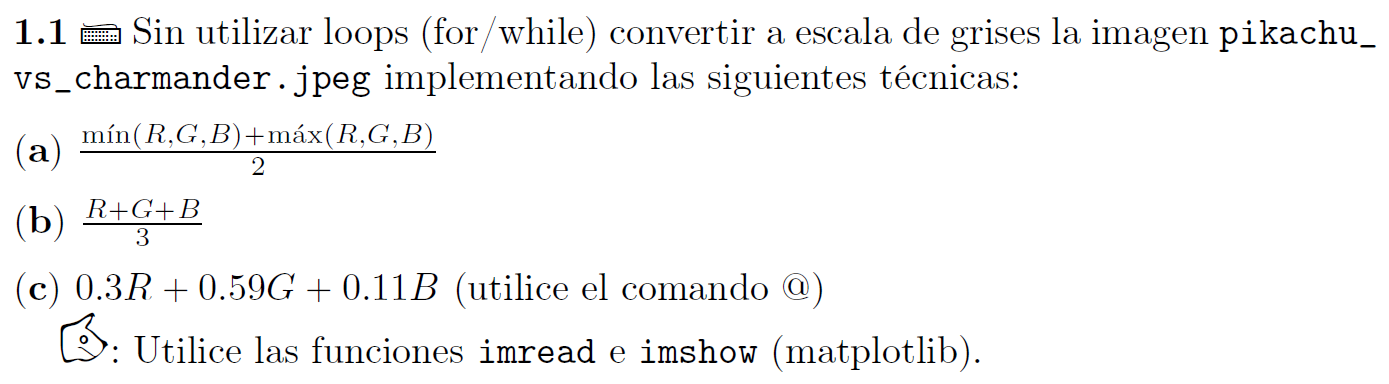

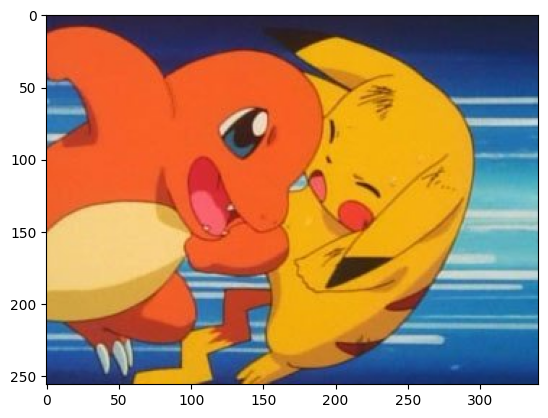

In [2]:
lienzo = plt.imread('/content/pikachu_vs_charmander.jpeg')
plt.imshow(lienzo)

In [ ]:
lienzo.shape

(256, 341, 3)

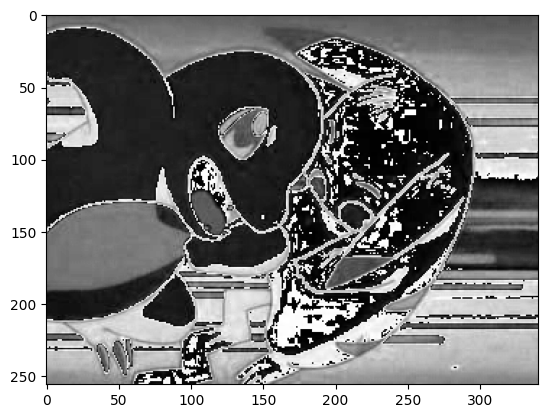

In [ ]:
alto = lienzo.shape[0]
ancho = lienzo.shape[1]
vector_size = lienzo.shape[2]
lienzo2 = np.array(lienzo)
lienzo2 = lienzo.reshape(alto*ancho,vector_size)

minimo = np.min(lienzo2,axis=1)
maximo = np.max(lienzo2,axis=1)
grayscale1= (minimo+maximo)/2
grayscale1 = grayscale1.reshape(alto,ancho)
#Por alguna razon hay que usar cmap = 'gray'
plt.imshow(grayscale1,cmap='gray')

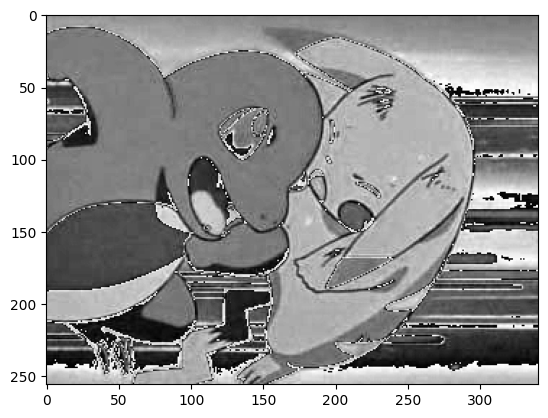

In [ ]:
lienzo3 = np.array(lienzo)
lienzo3 = lienzo.reshape(alto*ancho,1,vector_size)
R = lienzo3[:,:,0]
G = lienzo3[:,:,1]
B = lienzo3[:,:,2]
grayscale2 = (R+G+B)/3
grayscale2 = grayscale2.reshape(alto,ancho)
plt.imshow(grayscale2,cmap = 'gray')

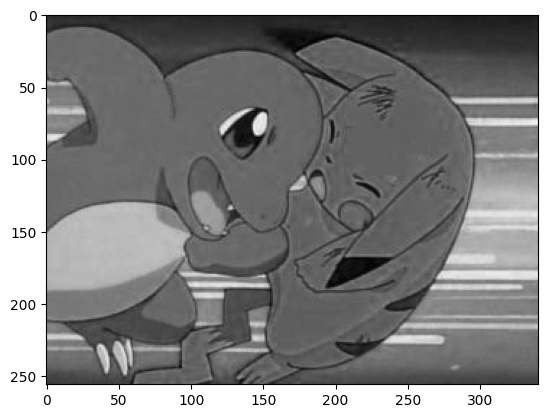

In [ ]:
lienzo3 = np.array(lienzo)
lienzo3 = lienzo.reshape(alto*ancho,vector_size)
grayscale3 = lienzo3@np.transpose([0.3,0.11,0.59])
grayscale3 = grayscale3.reshape(alto,ancho)
plt.imshow(grayscale3,cmap = 'gray')

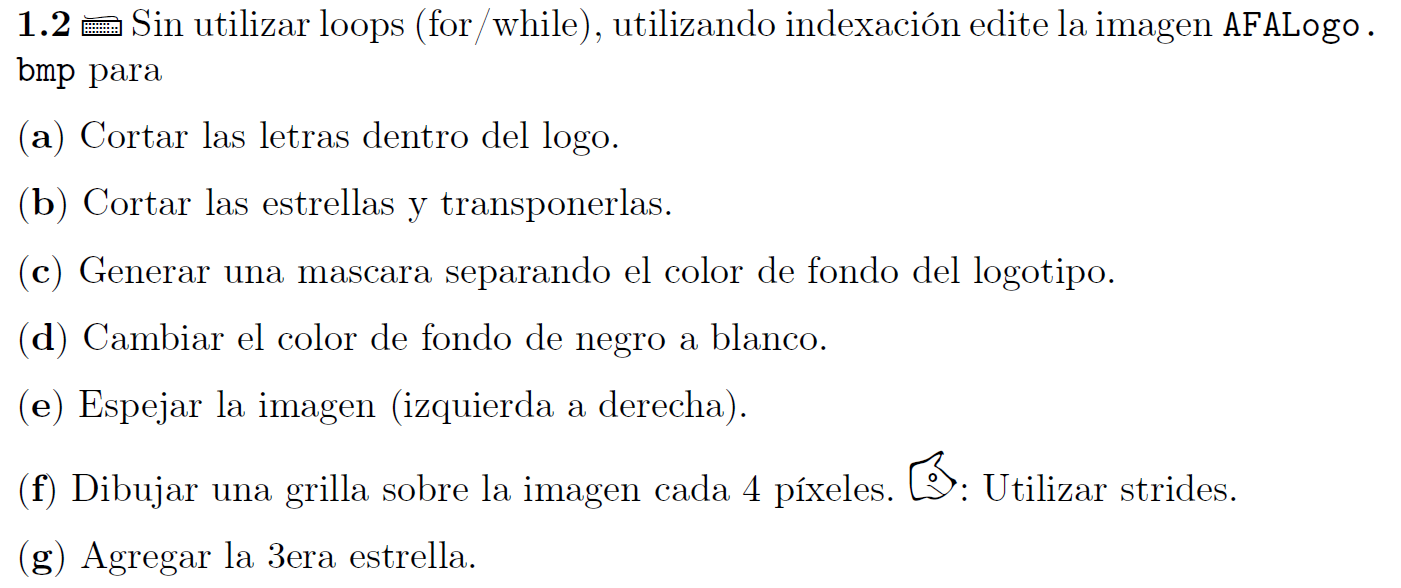

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

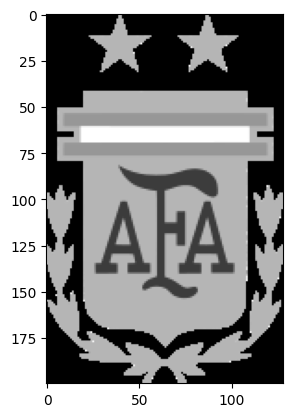

In [ ]:
logo = plt.imread('/content/AFALogo.bmp')
plt.imshow(logo,cmap='gray')

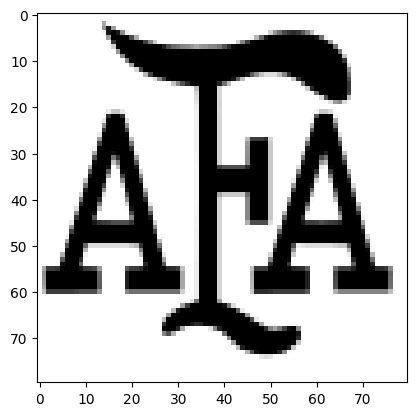

In [ ]:
#Recorte de las letras
recorte_letras = logo[80:160,25:105]
plt.imshow(recorte_letras, cmap ='gray')

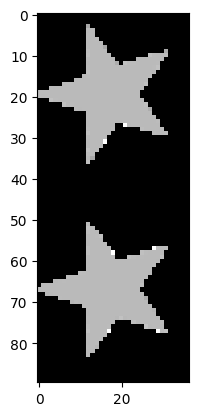

In [ ]:
#Recorte de las estrellas
recorte_estrellas = logo[0:37,20:110]
algo = recorte_estrellas.T
plt.imshow(algo, cmap='gray')

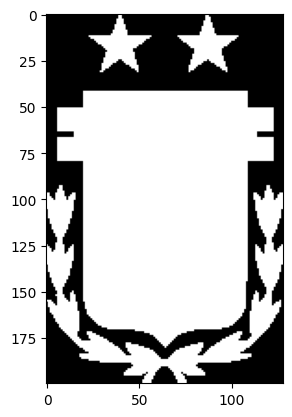

In [ ]:
#mascara
logo2 = np.where(logo == 0, 0,255)
plt.imshow(logo2, cmap='gray')

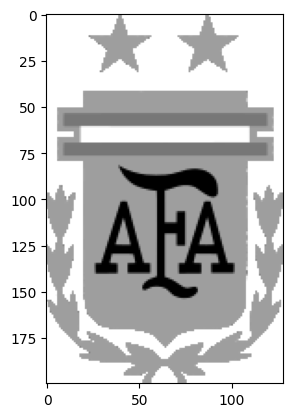

In [ ]:
#fondo blanco
logo3 = np.where(logo == 0,255,logo)
plt.imshow(logo3, cmap='gray')

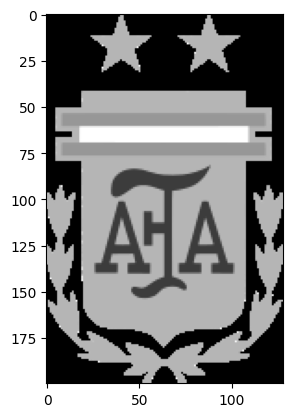

In [ ]:
#espejado
plt.imshow(logo[:,::-1], cmap='gray')

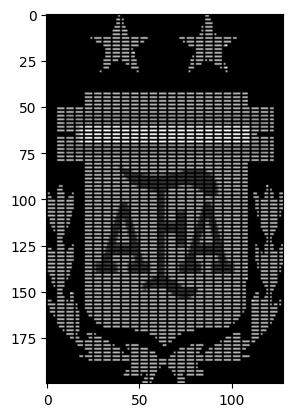

In [ ]:
#rejilla
dx = 2
dy = 5
logo4 = np.array(logo)
logo4[:,::dy] = 0
logo4[::dx,:] = 0
plt.imshow(logo4, cmap='gray')

Para agregar la tercera estrella, primero obtengo una estrella del logo original

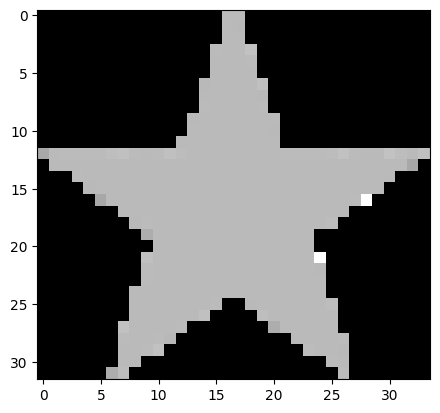

In [ ]:
#agregar estrella
estrellas = logo[0:32,23:57]
plt.imshow(estrellas,cmap='gray')

Luego paso a centrar la estrella, el calculo de la ubicacion de la estrella se hizo a mano.

El uso de la funcion *hstack* ayuda hacerlo posible


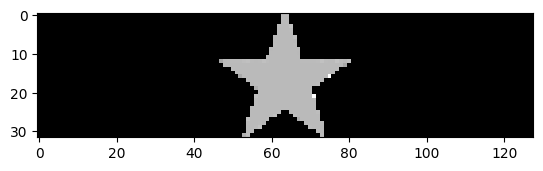

In [ ]:
fondo = np.zeros([32,47])
parte_arriba =np.hstack((fondo,estrellas,fondo))
plt.imshow(parte_arriba,cmap='gray')

Con la funcion *vstack* logro agregar la tercera estrella.

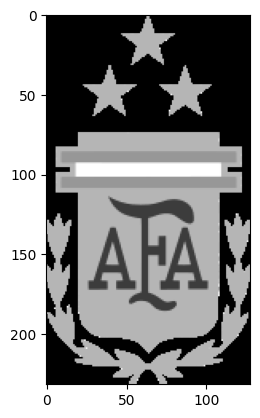

In [ ]:
logo_final=np.vstack((parte_arriba,logo))
plt.imshow(logo_final,cmap='gray')

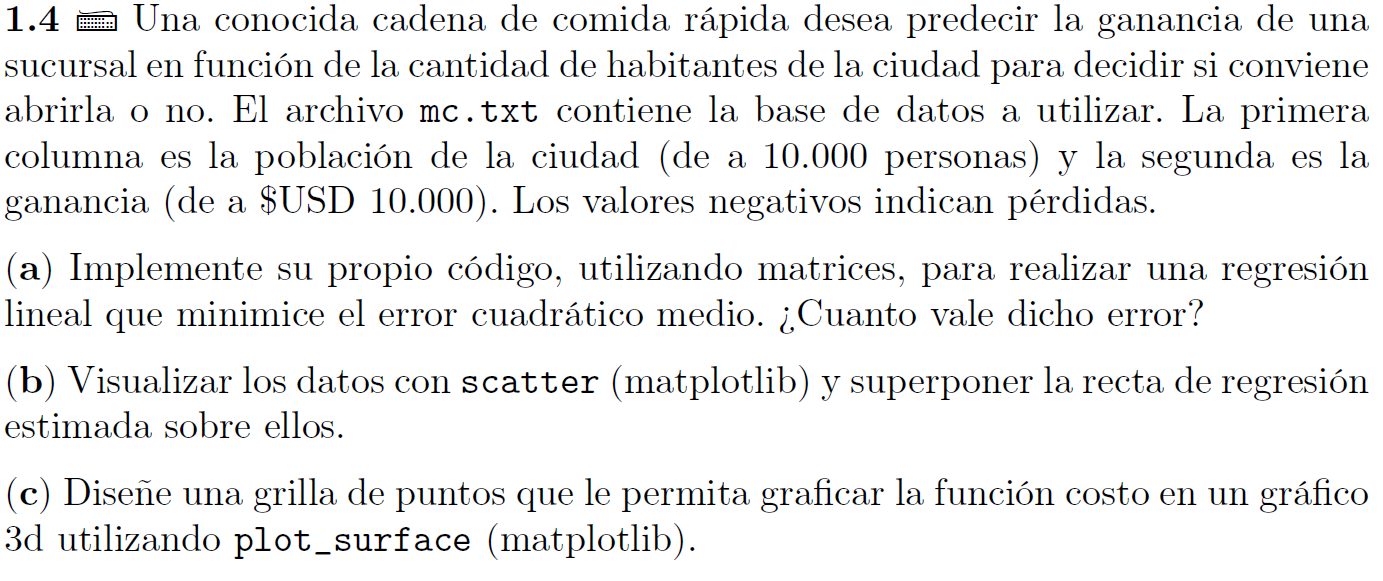

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from urllib import request

In [ ]:
example1_url="https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/mc.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

Calculo de la recta de regresion y grafico de los datos con la recta superpuesta.

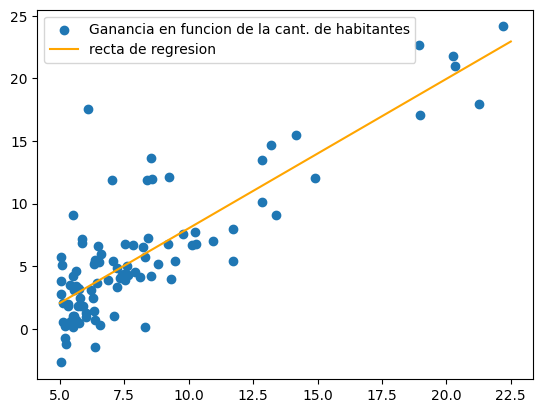

In [ ]:
x = dataset[:,0]
y = dataset[:,1]
plt.scatter(x,y,label='Ganancia en funcion de la cant. de habitantes')
a = np.transpose(np.vstack((x,np.ones(np.shape(x)))))
w = np.linalg.inv(np.transpose(a)@a)@np.transpose(a)@y

absisa = np.linspace(5, 22.5, num=100)
recta = w[0]*absisa+w[1]
plt.plot(absisa,recta, color='orange',label='recta de regresion')
plt.legend()


Se calcula el error cuadratico medio como:

𝔼[(y-y_hat)^2]


In [ ]:
y_hat = w[0]*x+w[1]
ECM = np.mean((y-y_hat)*(y-y_hat))
print("Error cuadratico medio:", ECM)

Error cuadratico medio: 8.953942751950358


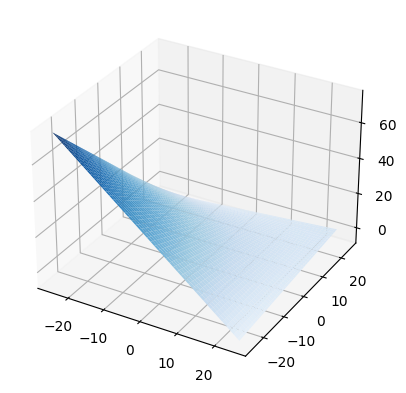

In [ ]:
#calculo de la funcion de costo en 3d
x_grid = np.arange(-25,25,0.5)
y_grid = np.arange(-25,25,0.5)
xx, yy = np.meshgrid(x_grid,y_grid);
y_hat_grid = w[0]*xx+w[1]
#La funcion costo se calcula mediante el error cuadratico
funcion_costo = (y_grid-y_hat_grid)*np.transpose((y_grid-y_hat_grid))
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xx, yy, funcion_costo,vmin=funcion_costo.min() * 2, cmap=cm.Blues)

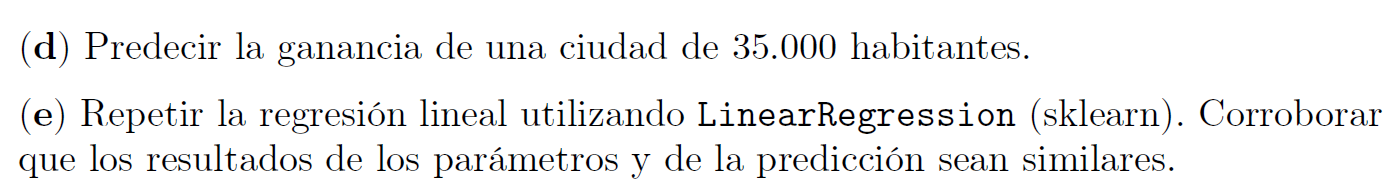

In [ ]:
#prediccion de la ganancia para 35000 habitantes (x = 3.5)
ganancia = w[0]*3.5+w[1]
print("La ganancia para 35000 habitantes es:", ganancia)

La ganancia para 35000 habitantes es: 0.2798368763517103


In [ ]:
x_data = x.reshape(-1,1)
modelo = sklearn.linear_model.LinearRegression().fit(x_data, y)

coeficientes = modelo.coef_
intercepto = modelo.intercept_
w_fit = [coeficientes,intercepto]
print("w calculado previamente:",w)
print("w mediante fit:", w_fit)
print("La ganancia para 35000 habitantes segun el nuevo modelo es:", coeficientes*3.5+intercepto)

w calculado previamente: [ 1.19303364 -3.89578088]
w mediante fit: [array([1.19303364]), -3.8957808783118484]
La ganancia para 35000 habitantes segun el nuevo modelo es: [0.27983688]


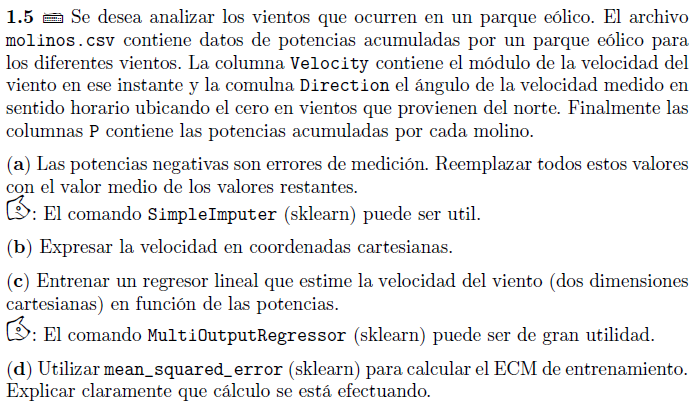

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import multioutput
from urllib import request

Se visualizo los datos previamente para saber cuales son las columnas que corresponden a las potencias y cuales a la velocidad y direccion respectivamente.

In [ ]:
data_url="https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/molinos.csv"
fdata = request.urlopen(data_url)
header = np.genfromtxt(data_url, dtype= str, delimiter=',', max_rows = 1)
dataset_molinos = np.genfromtxt(data_url, dtype= float, delimiter=',', skip_header = 1)

Para el curado de datos se calculo previamente la media de la matriz de potencia y con la funcion *where* se logro hacer el curado.

In [ ]:
#Curado de datos

potencias = dataset_molinos[:,:43]
velocidad = dataset_molinos[:,43]
direccion = dataset_molinos[:,44]

media = np.mean(potencias)
potencias_curadas = np.where(potencias < 0, media, potencias)

In [ ]:
#Expresion de la velocidad en coordenadas cartesianas
x_axis = velocidad*np.cos((direccion+270)*np.pi/180)
y_axis = velocidad*np.sin((direccion+270)*np.pi/180)
velocidad_cartesiana = np.transpose(np.vstack((x_axis,y_axis)))

In [ ]:
#Calculo del regresor para varias dimensiones
regresor_lineal = LinearRegression()
multi_regresor = sklearn.multioutput.MultiOutputRegressor(regresor_lineal)
multi_regresor.fit(potencias, velocidad_cartesiana)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
#Calculo del ECM

predicciones_entrenamiento = multi_regresor.predict(potencias)
ecm_entrenamiento = sklearn.metrics.mean_squared_error(velocidad_cartesiana, predicciones_entrenamiento)

print("Error cuadrático medio de entrenamiento:", ecm_entrenamiento)

Error cuadrático medio de entrenamiento: 20.50115978440497


El calculo que se esta haciendo es el siguiente

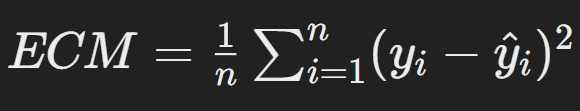

Por lo que es necesario calcular los valores predichos por el modelo para tener una medida de la calidad del regresor. El cálculo del ECM evalúa cómo de cerca están las predicciones del modelo respecto a los valores reales. Un valor de ECM más bajo indica que el modelo tiene un mejor ajuste a los datos.

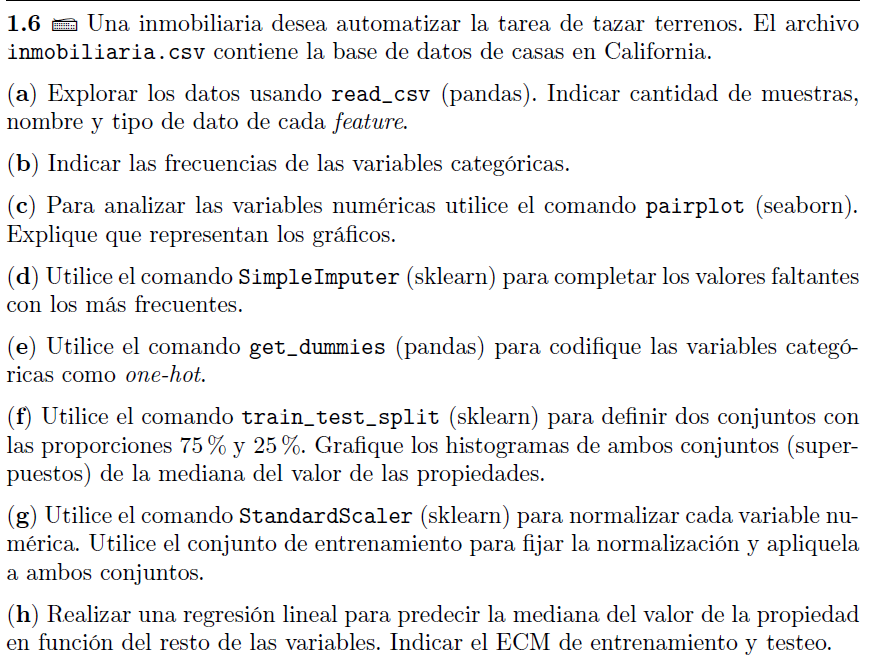

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputert
from urllib import request

In [ ]:
data_url="https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/inmobiliaria.csv"
fdata = request.urlopen(data_url)
header = np.genfromtxt(data_url, dtype= str, delimiter=',', max_rows = 1)
dataset_inmo = np.genfromtxt(data_url, delimiter=',', skip_header = 1)

In [ ]:
#a
dataframe_inmo = pd.read_csv(fdata)
dataframe_inmo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Las frecuencias de las variables categoricas que en este caso es solo *ocean_proximity* son las siguientes.

In [ ]:
pd.Series.value_counts(dataframe_inmo.ocean_proximity)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Creo un diccionario para los dataframes correspondientes a las variables aleatorias numericas

In [ ]:
dataframes_variables = {}
for columna in dataframe_inmo.select_dtypes(include='number').columns:
    dataframes_variables[columna] = pd.DataFrame(dataframe_inmo[columna])

Uso la funcion *pairplot* para ver algunas de las variables aleatorias.

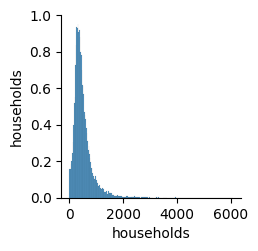

In [ ]:
sns.pairplot(data=dataframes_variables['households'], diag_kind='hist')

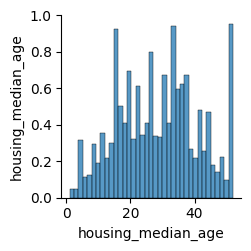

In [ ]:
sns.pairplot(data=dataframes_variables['housing_median_age'], diag_kind='hist')

Pero con ayuda de IA, grafico todas las frecuencias de las variables numericas. Para ello la IA recomendo la funcion *histplot* de la libreria seaborn.

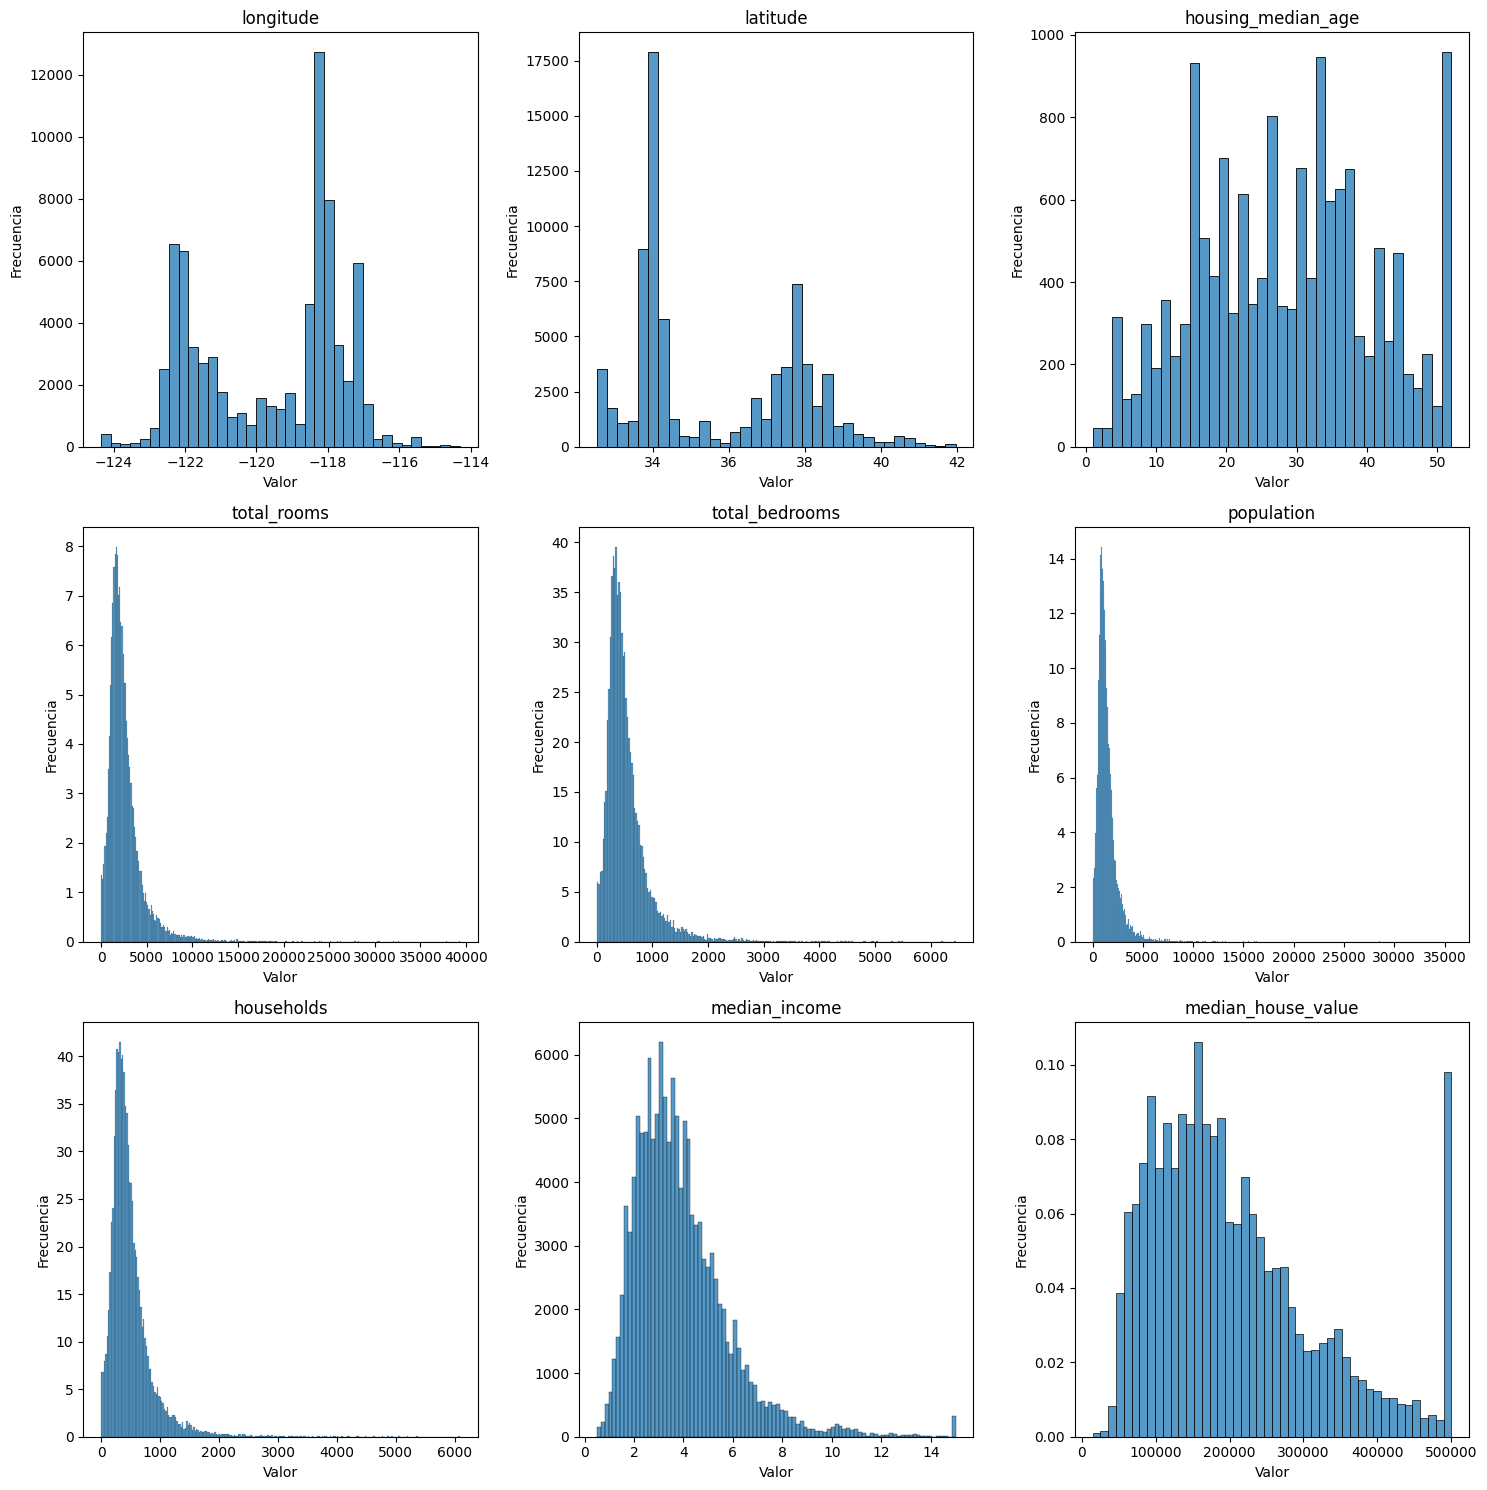

In [ ]:
num_variables = len(dataframes_variables)
num_cols = 3  # Número de columnas para los subplots
num_rows = -(-num_variables // num_cols)  # División redondeada hacia arriba

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Iterar sobre cada DataFrame individual y plotear los histogramas
for i, (nombre_variable, df_variable) in enumerate(dataframes_variables.items(), 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_variable.iloc[:, 0], kde=False,stat = 'frequency')
    plt.title(nombre_variable)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

Para completar los valores faltantes con los valores mas frecuentes, paso el dataframe a variables del tipo Numpy.

In [ ]:
arrays_variables = {}
for nombre_variable, df_variable in dataframes_variables.items():
    arrays_variables[nombre_variable] = df_variable.to_numpy()

Completo los valores faltantes con los los valores mas frecuentes.

In [ ]:
for nombre_variable, array_variable in arrays_variables.items():
    imputer = SimpleImputer(strategy='most_frequent')
    array_variable_imputado = imputer.fit_transform(array_variable)
    arrays_variables[nombre_variable] = array_variable_imputado

arrays_variables_imputados = {}

for nombre_variable, array_imputado in arrays_variables.items():
    # Asegurar que el array imputado sea unidimensional
    array_unidimensional = array_imputado.flatten()

    # Agregar el array imputado unidimensional al nuevo diccionario
    arrays_variables_imputados[nombre_variable] = array_unidimensional
dataframe_numericos = pd.DataFrame.from_dict(arrays_variables_imputados)

In [ ]:
dataframe_numericos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
df_aux = pd.DataFrame(dataframe_inmo.ocean_proximity)
new_dataframe = pd.concat([dataframe_numericos,df_aux], axis=1)
new_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Creo un nuevo dataframe en el cual convierte una columna de datos categóricos (*en este caso la columna de 'ocean_aproximity'*) en múltiples columnas de 0 y 1, donde cada columna representa una categoría y contiene un valor de 1 si la observación pertenece a esa categoría y 0 en caso contrario.

In [ ]:
new_dataframe_inmo = pd.get_dummies(new_dataframe)
new_dataframe_inmo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


Separo las entradas y salidas para entrenar la regresion lineal

In [ ]:
Y = new_dataframe_inmo.iloc[:,8]
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
 X = pd.concat([new_dataframe_inmo.iloc[:,:8], new_dataframe_inmo.iloc[:,9:]], axis=1)
 X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
 y = new_dataframe_inmo.iloc[:,8]
 X = pd.concat([new_dataframe_inmo.iloc[:,:8], new_dataframe_inmo.iloc[:,9:]], axis=1)

 X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=123)

A continuacion se muestra el histograma de los valores medios de las casas superpuestas de los datos de entrenamiento y testeo

Text(0.5, 1.0, 'Median house value')

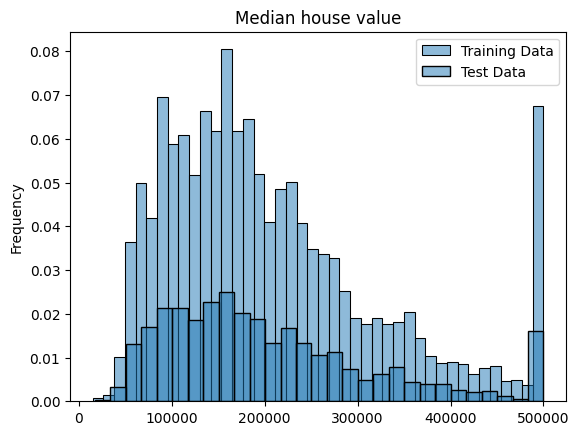

In [ ]:
sns.histplot(pd.DataFrame(y_train),color = 'blue',label='Training Data',stat = 'frequency')
sns.histplot(pd.DataFrame(y_test),color = 'red',label='Test Data',stat = 'frequency')
plt.legend()
plt.title('Median house value')

Normalizo los datos. Dicha normalizacion se hace de acuerdo a cada conjunto de datos.

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()

scaler.fit(y_train.values.reshape(-1,1))
y_norm_train = scaler.transform(y_train.values.reshape(-1,1))

scaler.fit(y_test.values.reshape(-1,1))
y_norm_test = scaler.transform(y_test.values.reshape(-1,1))

scaler.fit(X_train.values)
X_norm_train = scaler.transform(X_train.values)

scaler.fit(X_test.values)
X_norm_test = scaler.transform(X_test.values)



In [ ]:
regresor_lineal = sklearn.linear_model.LinearRegression()
regresor_lineal.fit(X_norm_train, y_norm_train)

LinearRegression()

In [ ]:
#Calculo del ECM

y_predicted = regresor_lineal.predict(X_norm_test)
ecm_entrenamiento = sklearn.metrics.mean_squared_error(y_norm_test, y_predicted)

print("Error cuadrático medio de entrenamiento:", ecm_entrenamiento)

Error cuadrático medio de entrenamiento: 0.3562839645427687


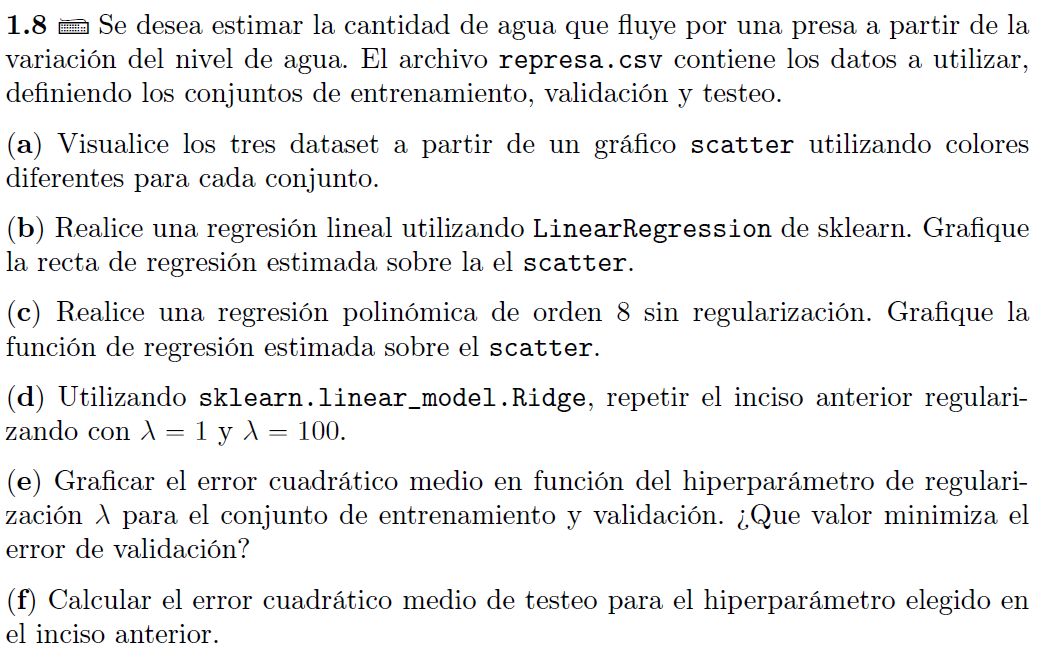

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from urllib import request

In [ ]:
represa_url="https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/represa.csv"
fdata_represa = request.urlopen(represa_url)
header = np.genfromtxt(represa_url, dtype= str, delimiter=',', max_rows = 1)
dataset_represa = np.genfromtxt(represa_url, delimiter=',', skip_header = 1)

In [ ]:
dataframe_represa = pd.read_csv(represa_url)
dataframe_represa

,Xtrain,ytrain,Xval,yval,Xtest,ytest
0,-15.936758,2.134311,-16.746536,4.170202,-33.318004,3.316890
1,-29.152979,1.173257,-14.577471,4.067263,-37.912164,5.397690
2,36.189549,34.359109,34.515759,31.873068,-51.206938,0.130430
3,37.492187,36.837955,-47.010076,10.623656,-6.132596,6.192598
4,-48.058829,2.808965,36.975119,31.836021,21.261183,17.088487
5,-8.941458,2.121072,-40.686110,4.959370,-40.319529,0.799508
6,15.307793,14.710268,-4.472011,4.451599,-14.541532,2.824792
7,-34.706266,2.614184,26.533635,22.276318,32.559760,28.621233
8,1.389154,3.740172,-42.797683,-0.000044,13.393433,17.046391
9,-44.383760,3.731691,25.374099,20.503802,44.209886,55.384373


Separo los datos de validacion, testeo y entrenamiento.

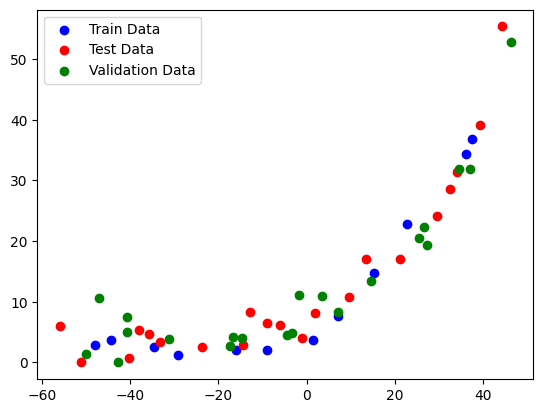

In [ ]:
data_train = dataset_represa[:,:2]
data_validation = dataset_represa[:,2:4]
data_test = dataset_represa[:,4:]

plt.scatter(data_train[:,0],data_train[:,1],color='blue',label = 'Train Data')
plt.scatter(data_test[:,0],data_test[:,1],color='red',label = 'Test Data')
plt.scatter(data_validation[:,0],data_validation[:,1],color='green', label = 'Validation Data')
plt.legend()

In [ ]:
x = data_train[:12,0]
y = data_train[:12,1]

Creo y entreno el regresor lineal. Como los datos de entrenamiento tiene valores 'Nan' los completo con su media

In [ ]:
regresor_lineal_8b = LinearRegression()
regresor_lineal_8b.fit(x.reshape(-1,1),y)

LinearRegression()

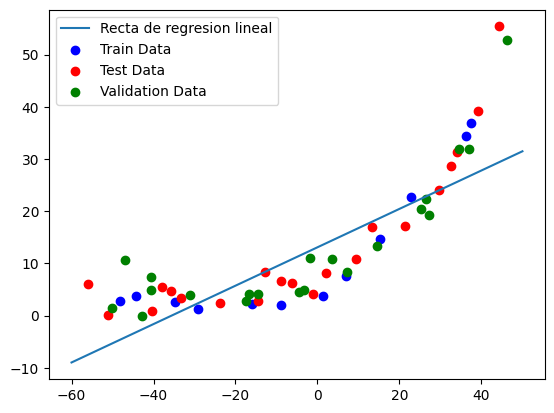

In [ ]:
[pendiente, ordenada] = [regresor_lineal_8b.coef_, regresor_lineal_8b.intercept_]

xx_ = np.linspace(-60,50,100)
yy_=xx_*pendiente+ordenada
yy_ = np.transpose(yy_)
plt.plot(xx_,yy_, label='Recta de regresion lineal')
plt.scatter(data_train[:,0],data_train[:,1],color='blue',label = 'Train Data')
plt.scatter(data_test[:,0],data_test[:,1],color='red',label = 'Test Data')
plt.scatter(data_validation[:,0],data_validation[:,1],color='green', label = 'Validation Data')
plt.legend()

Regresion polinomica

In [ ]:
#normalizo los datos
scaler = sklearn.preprocessing.StandardScaler()
x_norm = scaler.fit_transform(x.reshape(-1,1))
y_norm = scaler.fit_transform(y.reshape(-1,1))

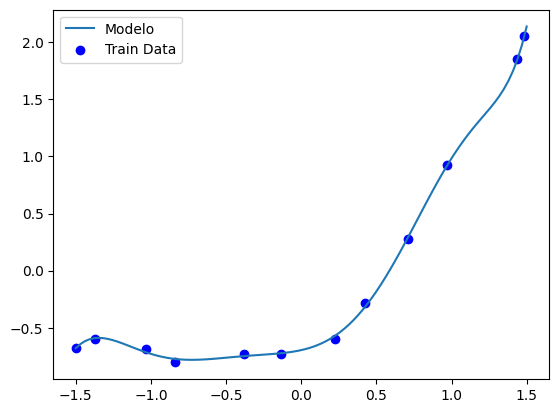

In [ ]:
pol_regresor = sklearn.preprocessing.PolynomialFeatures(degree=8)
pol_lineal = LinearRegression()
pol_model = Pipeline([("polynomial_features",pol_regresor), ("linear_regression",pol_lineal)])
pol_model.fit(x_norm,y_norm)
X_test = np.linspace(-1.5, 1.5, 100)

plt.plot(X_test, pol_model.predict(X_test[:, np.newaxis]), label="Modelo")
plt.scatter(x_norm,y_norm,color='blue',label = 'Train Data')
plt.legend()

Ahora se realiza lo mismo pero en vez de usar una regresion lineal 'simple' se utliza un regresor lineal del tipo l2 con regularizacion de 1 y 100.

Se puede obsevar que a mayor lambda, el modelo tiene a tener un comportamiento '*underfitting*', mientras que cuando el valor de lambda es menor tiene un comportamiento tendiendo al '*overfitting*'.

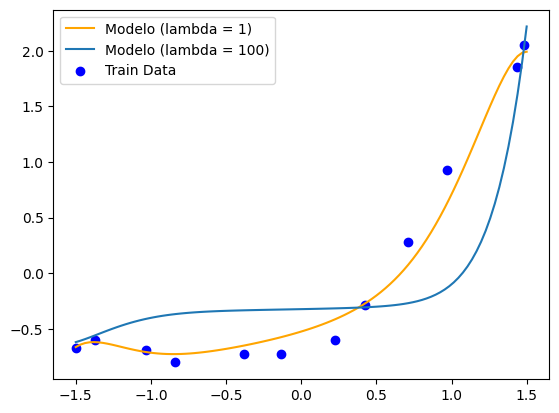

In [ ]:
pol_lineal2 = sklearn.linear_model.Ridge(alpha=1.0)
pol_model2 = Pipeline([("polynomial_features",pol_regresor), ("ridge",pol_lineal2)])
pol_model2.fit(x_norm,y_norm)

pol_lineal3 = sklearn.linear_model.Ridge(alpha=100)
pol_model3 = Pipeline([("polynomial_features",pol_regresor), ("ridge",pol_lineal3)])
pol_model3.fit(x_norm,y_norm)

plt.plot(X_test, pol_model2.predict(X_test[:, np.newaxis]), color = 'orange',label="Modelo (lambda = 1)")
plt.plot(X_test, pol_model3.predict(X_test[:, np.newaxis]), label="Modelo (lambda = 100)")

plt.scatter(x_norm,y_norm,color='blue',label = 'Train Data')
plt.legend()

In [ ]:
#normalizo los datos de validacion
x_norm_val = scaler.fit_transform(data_validation[:,0].reshape(-1,1))
y_norm_val = scaler.fit_transform(data_validation[:,1].reshape(-1,1))

Se realiza el grafico del error cuadratico medio en funcion del regularizador lambda, como se puede ver a mayor valor de lambda mayor ECM, sin importar si los datos son de testeos o de validacion.

Por lo tanto, los valores mas chicos de lambda generan menor ECM.

Text(0.5, 1.0, 'Lambda vs ECM')

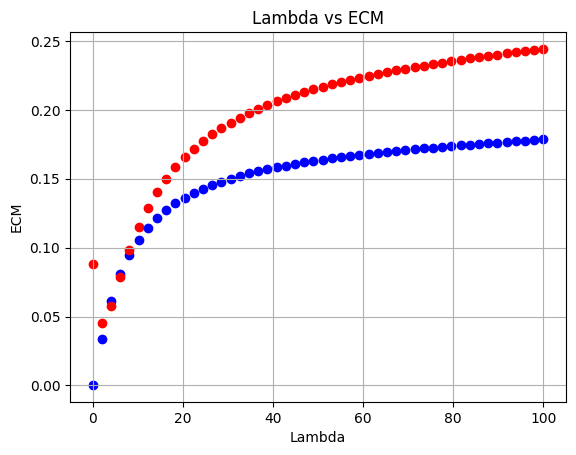

In [ ]:
pol_regresor = sklearn.preprocessing.PolynomialFeatures(degree=8)
cant_muestras = 50
lambda_reg = np.linspace(0,100,cant_muestras)
y_predicted = np.zeros((x_norm.shape[0],cant_muestras))
y_predicted_val = np.zeros((x_norm.shape[0],cant_muestras))
ECMs = np.zeros(cant_muestras)
ECMs_val = np.zeros(cant_muestras)
j = 0

def create_model(reg):
  pol_lineal_ = sklearn.linear_model.Ridge(alpha=i)
  pol_model_ = Pipeline([("polynomial_features",pol_regresor), ("ridge",pol_lineal_)])
  return pol_model_

for i in lambda_reg:
  modelo  = create_model(i)
  modelo.fit(x_norm,y_norm)
  y_predicted[:,j] = modelo.predict(x_norm)[:,0]
  y_predicted_val[:,j] = modelo.predict(x_norm_val[:12])[:,0]
  ECMs[j] = sklearn.metrics.mean_squared_error(y_norm, y_predicted[:,j])
  ECMs_val[j] = sklearn.metrics.mean_squared_error(y_norm_val[:12], y_predicted_val[:,j])
  plt.scatter(i,ECMs[j],color = 'blue')
  plt.scatter(i,ECMs_val[j],color = 'red')
  j=j+1

plt.xlabel('Lambda')
plt.ylabel('ECM')
plt.grid(True)
plt.title('Lambda vs ECM')


Para el valor de lambda que hace que el ECM de validacion sea menor, calculo el ECM para los datos de testeo.

In [ ]:
x_norm_test = scaler.fit_transform(data_test[:,0].reshape(-1,1))
y_norm_test = scaler.fit_transform(data_test[:,1].reshape(-1,1))

new_model = create_model(lambda_reg[1])
new_model.fit(x_norm,y_norm)
y_predicted_test= modelo.predict(x_norm_test[:12])[:,0]

ECMs_test = sklearn.metrics.mean_squared_error(y_norm_test[:12], y_predicted_test)

print("ECM del modelo con el conjunto de testeo:", ECMs_test)

ECM del modelo con el conjunto de testeo: 0.2124792183246712


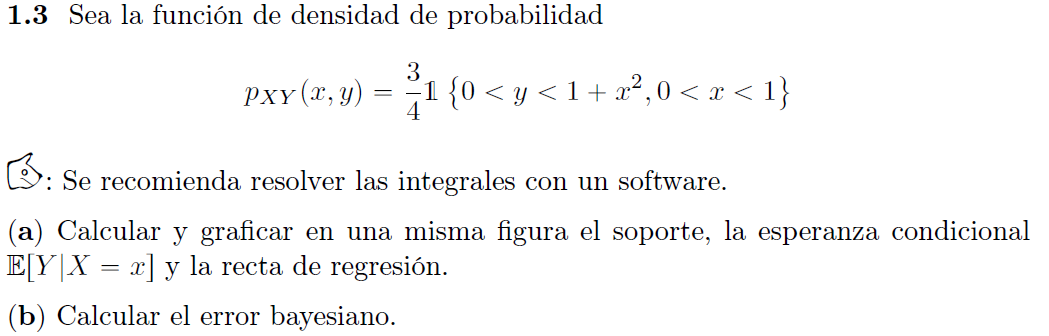

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

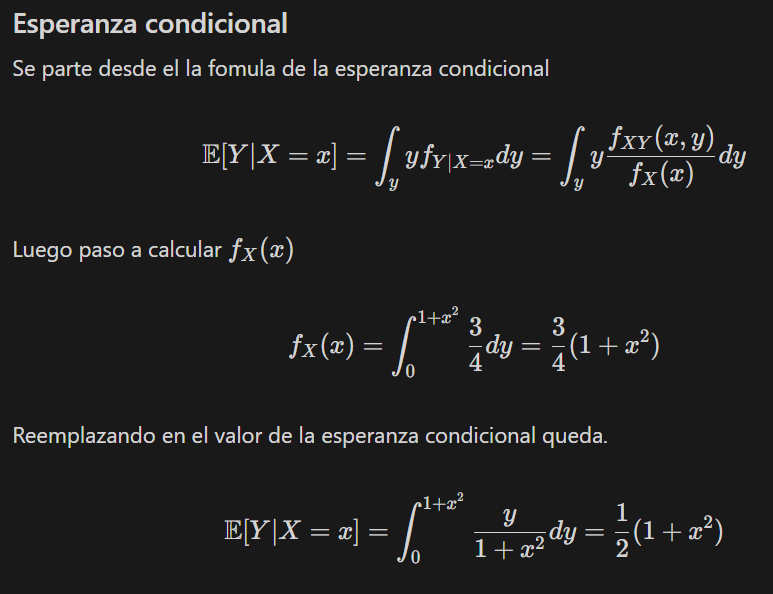

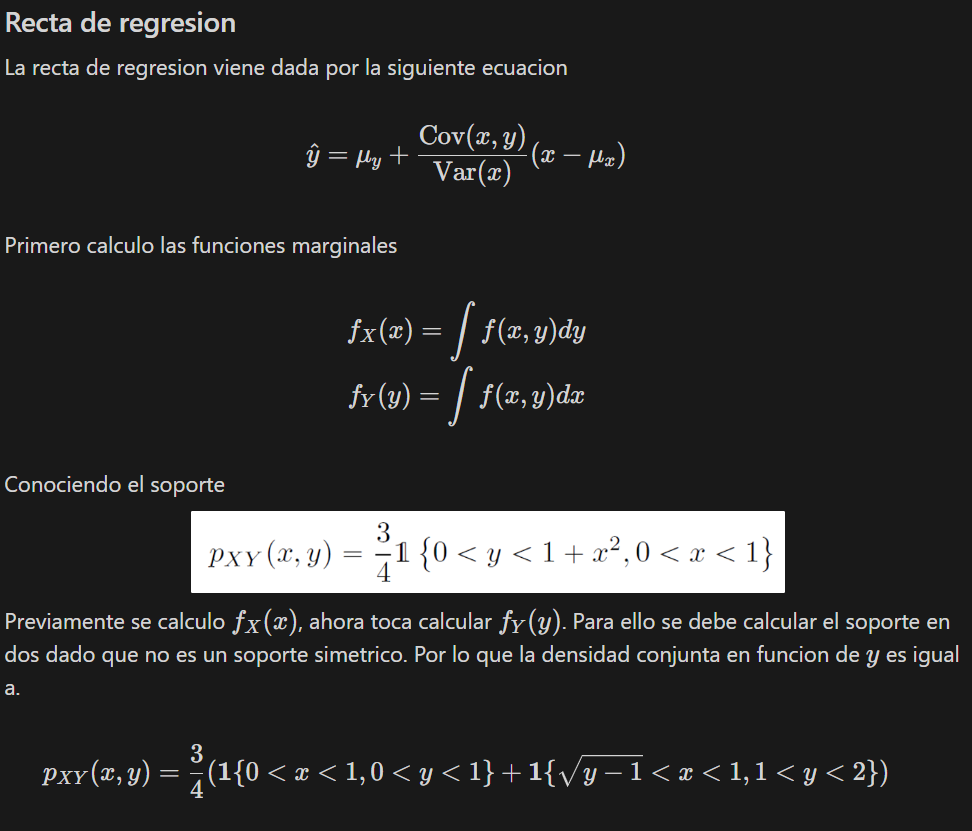

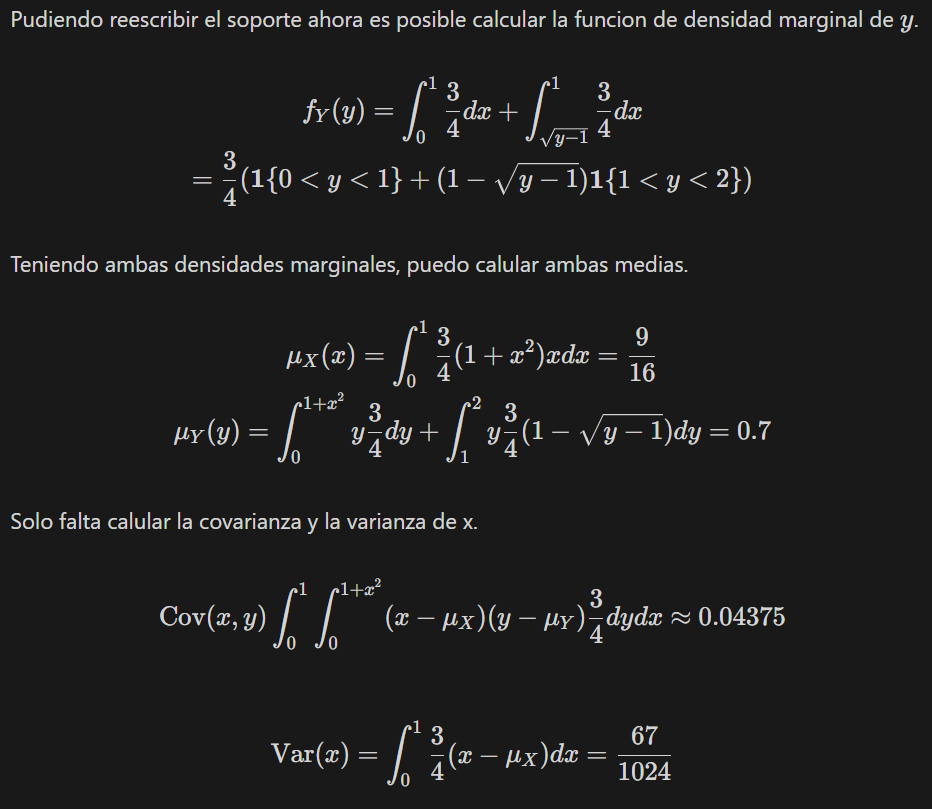

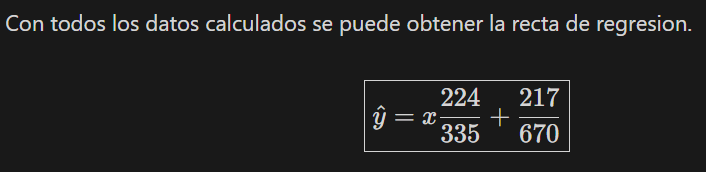

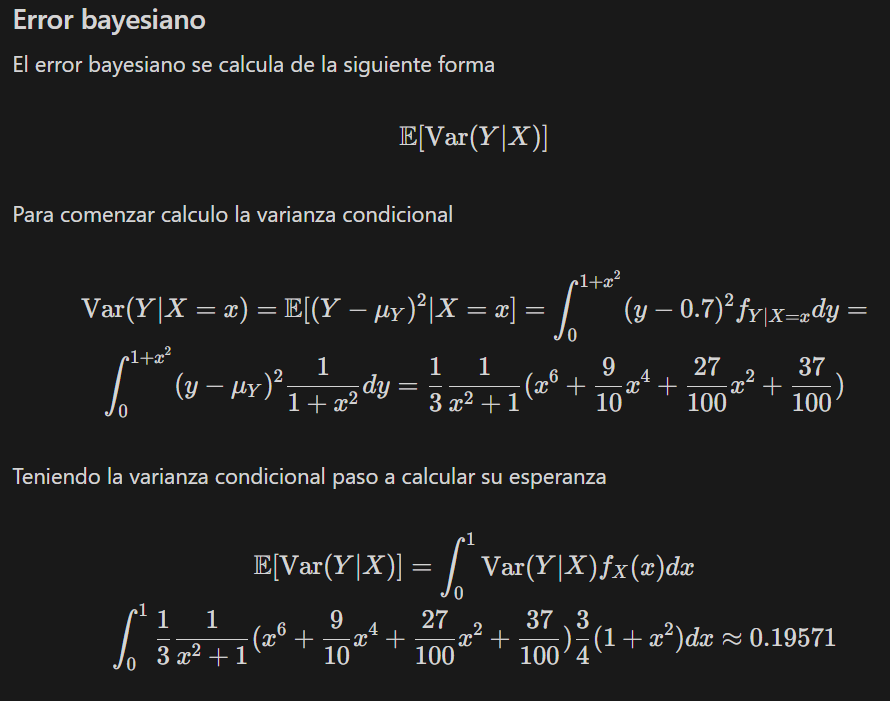

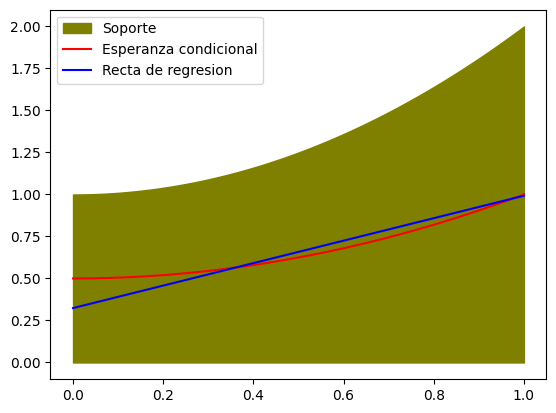

In [ ]:
x = np.linspace(0,1,100)
y = 1+x**2
fig, ax = plt.subplots()
ax.fill_between(x = x, y1 = y,label='Soporte',color='olive')

esp_cond = 0.5*y
recta_regresion = x*224/335+217/670
plt.plot(x,esp_cond, color='red', label='Esperanza condicional')
plt.plot(x,recta_regresion, color='blue', label='Recta de regresion')
plt.legend(loc='upper left')

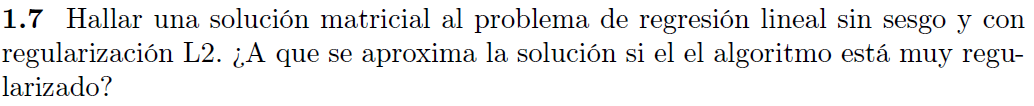

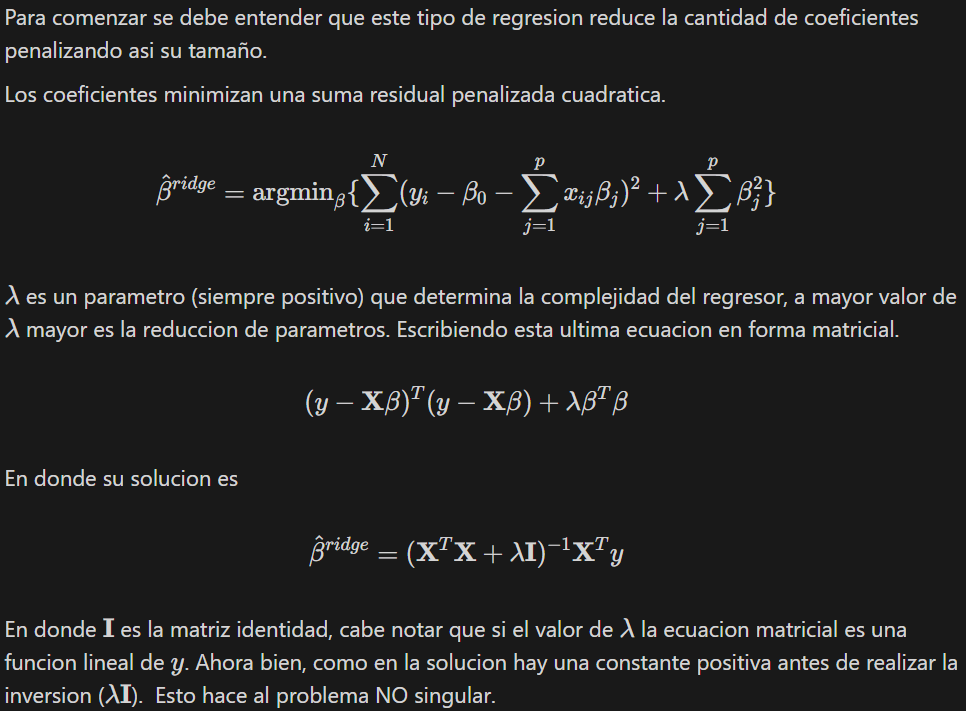

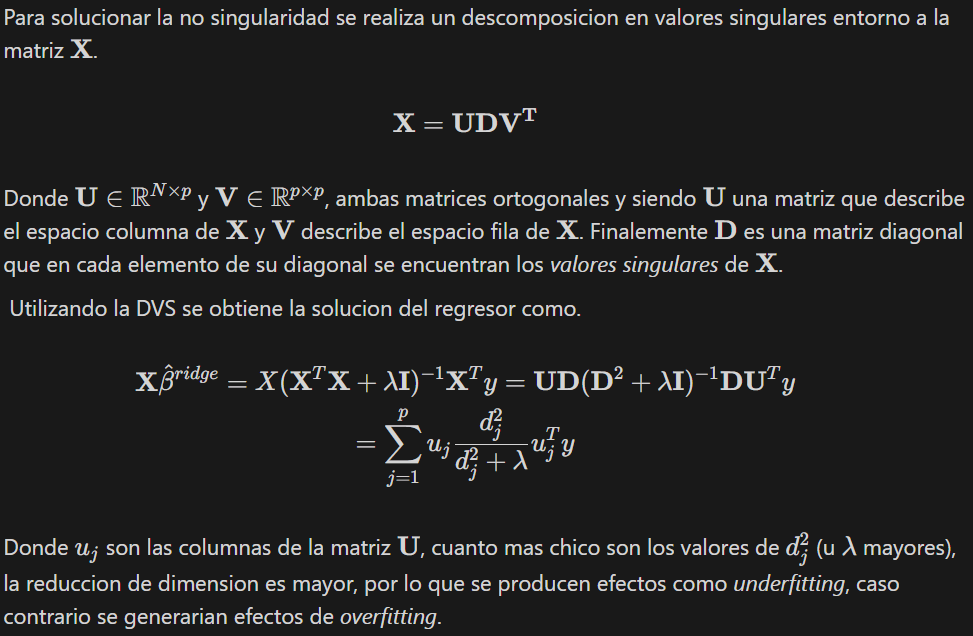